<a href="https://colab.research.google.com/github/EminIsmayilzada/Machine-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
X, y= mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

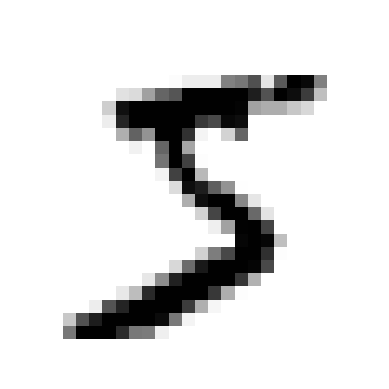

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(X):
  X=X.reshape(28,28)
  plt.imshow(X, cmap='binary')
  plt.axis('off')

plot_digit(X[0])

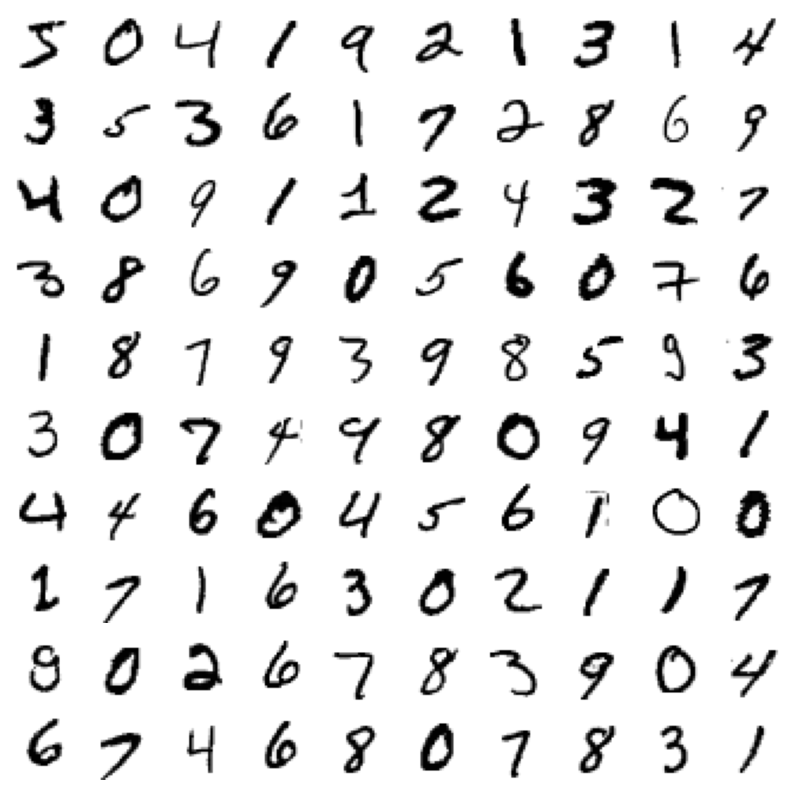

In [ ]:
plt.figure(figsize=(10,10))
for idx, image in enumerate(X[:100]):
  plt.subplot(10,10, idx+1)
  plot_digit(image)

In [ ]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.score(X_test, y_test_5)

0.9492

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
sgd_clf.predict([X[0]])

array([ True])

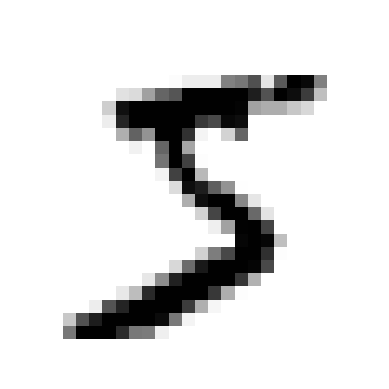

In [ ]:
plot_digit(x[0])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [ ]:
import pandas as pd

pd.Series(y_train_5).value_counts()/len(y_train_5)

,count
False,0.90965
True,0.09035


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

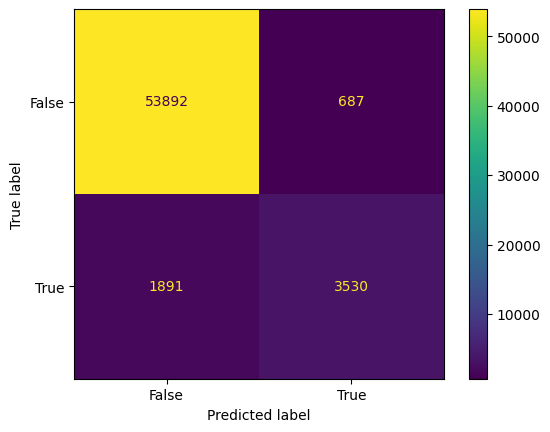

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
cm[1,1]/ (cm[1,1]+cm[0,1])

0.8370879772350012

In [ ]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.6511713705958311

In [ ]:
sgd_clf.decision_function(X_train[[100]])

array([1854.68328897])

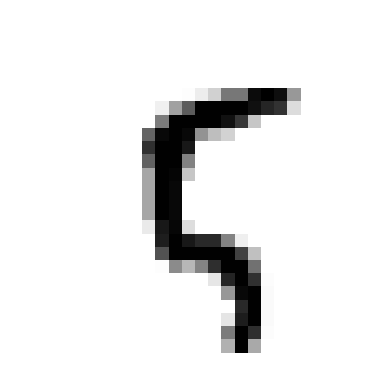

In [ ]:
plot_digit(X_train[100])

In [ ]:
y_scores =cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, theresholds= precision_recall_curve(y_train_5, y_scores)
precisions, recalls, theresholds

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]))